## AI Project

In [3]:
import json 
import numpy as np
import pandas as pd

with open("yelp_dataset/yelp_academic_dataset_business.json", 'r') as f:
    business_head = [next(f) for x in range(3)]
f.close()

business_data = []
for line in business_head:
    business_data.append(json.loads(line))

business_df = pd.DataFrame(business_data)

with open("yelp_dataset/yelp_academic_dataset_review.json", 'r') as f:
    review_head = [next(f) for x in range(3)]
f.close()

review_data = []
for line in review_head:
    review_data.append(json.loads(line))

review_df = pd.DataFrame(review_data)

df = review_df.join(business_df, lsuffix='_r', rsuffix='_b')

print(df)

            business_id_r  cool                 date  funny  \
0  -MhfebM0QIsKt87iDN-FNw     0  2015-04-15 05:21:16      0   
1  lbrU8StCq3yDfr-QMnGrmQ     0  2013-12-07 03:16:52      1   
2  HQl28KMwrEKHqhFrrDqVNQ     0  2015-12-05 03:18:11      0   

                review_id  stars_r  \
0  xQY8N_XvtGbearJ5X4QryQ      2.0   
1  UmFMZ8PyXZTY2QcwzsfQYA      1.0   
2  LG2ZaYiOgpr2DK_90pYjNw      5.0   

                                                text  useful  \
0  As someone who has worked with many museums, I...       5   
1  I am actually horrified this place is still in...       1   
2  I love Deagan's. I do. I really do. The atmosp...       1   

                  user_id                    address  ...         city  \
0  OwjRMXRC0KyPrIlcjaXeFQ            10913 Bailey Rd  ...    Cornelius   
1  nIJD_7ZXHq-FX8byPMOkMQ  8880 E Via Linda, Ste 107  ...   Scottsdale   
2  V34qejxNsCbcgD8C0HVk-Q      3554 Rue Notre-Dame O  ...     Montreal   

                                        

### Top Rated

In [41]:
top_rated = sorted(data, key=lambda i: -(i['stars'] * i['review_count']))

for x in top_rated[:10]:
    print(x['name'] + "  " + str(x['stars']) + "  " + str(x['review_count']))

Mi Mi Restaurant  4.0  116
Irene's Tap Room  4.5  79
Papaya Thai  2.5  130
Green World Cleaners  3.5  81
Scramblers - Strongsville  3.5  81
Autohaus Az  3.5  79
Oasis Auto Center - Gilbert  4.5  38
Manolo Blahnik  4.5  32
Bass Pro Shops Outdoor World  3.5  39
Glendale Glitters  2.5  52


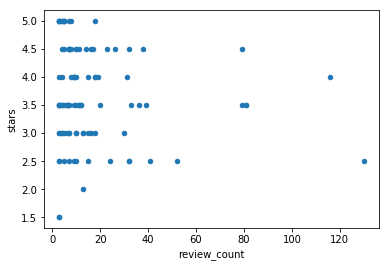

In [18]:
import matplotlib.pyplot as plt

df.plot(kind='scatter',x='review_count',y='stars')
plt.show()

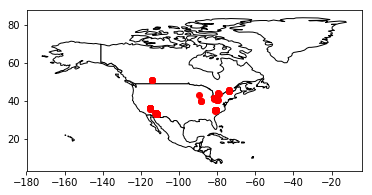

In [23]:
import geopandas

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')

plt.show()